In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, Conv2DTranspose
from tensorflow.keras.models import Model

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist, cifar10

In [ ]:
class_labels = { 0: "T-shirt/top", 
                1: "Trouser",
                2: "Pullover",
                3: "Dress",
                4: "Coat",
                5: "Sandal",
                6: "Shirt",
                7: "Sneaker",
                8: "Bag",
                9: "Ankle-boot" 
            }

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

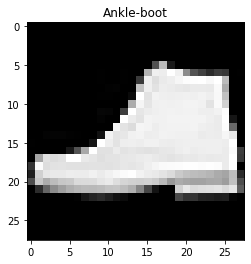

In [ ]:
# show a random image from the training set
pixels, class_label = x_train[42], class_labels[y_train[42]]
plt.title(str(class_label))
plt.imshow(pixels, cmap='gray')
plt.show()

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape, x_test.shape) 

(60000, 28, 28) (10000, 28, 28)


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
# First Encoder model

def Encoder(input_img):
    x = Conv2D(24, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(12, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)
    return encoded

In [ ]:
# First Decoder model

def Decoder(encoded):
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((4, 4))(x)
    x = Conv2D(12, (3, 3), activation='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return decoded

In [ ]:
# First Autoencoder model

input = Input(shape=(28, 28, 1))
encoder = Encoder(input)
decoder = Decoder(encoder)
autoencoder = Model(input, decoder)
autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 12)        2604      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 12)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           872   

In [ ]:
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, validation_data = (x_test, x_test)) 

Epoch 1/50
235/235 [==============================] - 16s 23ms/step - loss: 0.4249 - val_loss: 0.3276
Epoch 2/50
235/235 [==============================] - 5s 21ms/step - loss: 0.3165 - val_loss: 0.3124
Epoch 3/50
235/235 [==============================] - 5s 21ms/step - loss: 0.3081 - val_loss: 0.3078
Epoch 4/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3046 - val_loss: 0.3052
Epoch 5/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3023 - val_loss: 0.3033
Epoch 6/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3007 - val_loss: 0.3020
Epoch 7/50
235/235 [==============================] - 5s 20ms/step - loss: 0.2994 - val_loss: 0.3009
Epoch 8/50
235/235 [==============================] - 5s 22ms/step - loss: 0.2984 - val_loss: 0.3001
Epoch 9/50
235/235 [==============================] - 5s 21ms/step - loss: 0.2975 - val_loss: 0.2990
Epoch 10/50
235/235 [==============================] - 5s 20ms/step - loss: 0.2968 - val_l

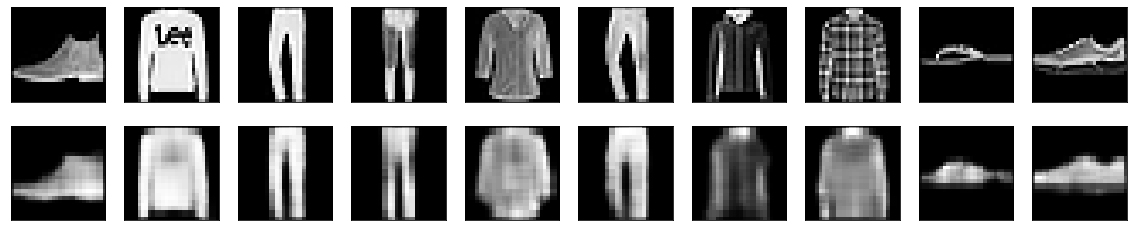

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
 plt.gray()
 ax = plt.subplot(2, n, i+1)
 plt.imshow(x_test[i].reshape(28, 28))
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 
 ax = plt.subplot(2, n, i +1+n)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show() 

In [ ]:
# 2nd Encoder model

def Encoder_ConvTranspose(input_img):
    x = Conv2D(24, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(12, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)
    return encoded

# 2nd Decoder model

def Decoder_ConvTranspose(encoded):
    x = Conv2DTranspose(8, (3, 3), strides = 2, activation='relu', padding='same')(encoded)
    x = Conv2DTranspose(12, (3, 3), strides = 2, activation='relu', padding='same')(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return decoded


# 2nd Autoencoder model

input = Input(shape=(28, 28, 1))
encoder2 = Encoder_ConvTranspose(input)
decoder2 = Decoder_ConvTranspose(encoder2)
autoencoder2 = Model(input, decoder2)
autoencoder2.compile(optimizer = "adam", loss = "binary_crossentropy")
autoencoder2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 24)        240       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 12)        2604      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 12)         0         
 g2D)                                                            
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 14, 14, 8)        872 

In [ ]:
history = autoencoder2.fit(x_train, x_train, epochs = 50, batch_size = 256, validation_data = (x_test, x_test)) 

Epoch 1/50
235/235 [==============================] - 7s 26ms/step - loss: 0.3819 - val_loss: 0.2938
Epoch 2/50
235/235 [==============================] - 5s 22ms/step - loss: 0.2840 - val_loss: 0.2813
Epoch 3/50
235/235 [==============================] - 5s 23ms/step - loss: 0.2765 - val_loss: 0.2764
Epoch 4/50
235/235 [==============================] - 5s 22ms/step - loss: 0.2728 - val_loss: 0.2737
Epoch 5/50
235/235 [==============================] - 5s 21ms/step - loss: 0.2705 - val_loss: 0.2716
Epoch 6/50
235/235 [==============================] - 5s 21ms/step - loss: 0.2686 - val_loss: 0.2701
Epoch 7/50
235/235 [==============================] - 5s 21ms/step - loss: 0.2673 - val_loss: 0.2689
Epoch 8/50
235/235 [==============================] - 5s 23ms/step - loss: 0.2663 - val_loss: 0.2679
Epoch 9/50
235/235 [==============================] - 5s 21ms/step - loss: 0.2654 - val_loss: 0.2672
Epoch 10/50
235/235 [==============================] - 5s 21ms/step - loss: 0.2647 - val_lo

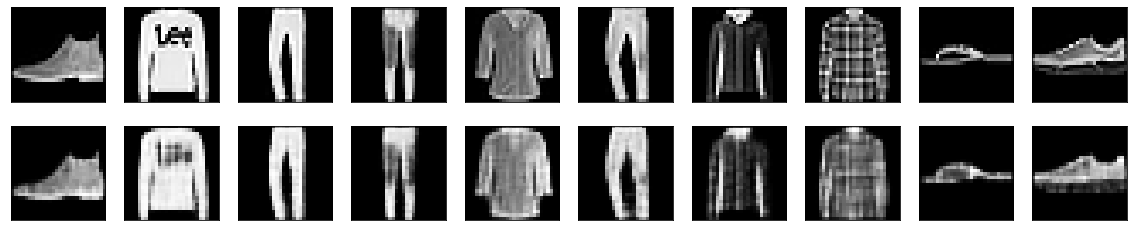

In [ ]:
decoded_imgs_2 = autoencoder2.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
 plt.gray()
 ax = plt.subplot(2, n, i+1)
 plt.imshow(x_test[i].reshape(28, 28))
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 
 ax = plt.subplot(2, n, i +1+n)
 plt.imshow(decoded_imgs_2[i].reshape(28, 28))
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()

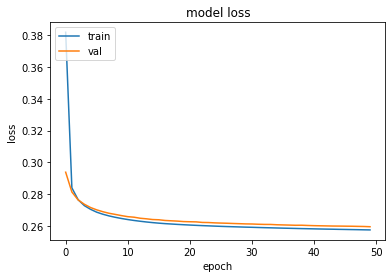

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# 3rd Autoencoder model

def Encoder_ConvTranspose_2(input_img):
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)
    return encoded

def Decoder_ConvTranspose_2(encoded):
    x = Conv2DTranspose(16, (3, 3), strides = 2, activation='relu', padding='same')(encoded)
    x = Conv2DTranspose(32, (3, 3), strides = 2, activation='relu', padding='same')(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return decoded



input = Input(shape=(28, 28, 1))
encoder3 = Encoder_ConvTranspose_2(input)
decoder3 = Decoder_ConvTranspose_2(encoder3)
autoencoder3 = Model(input, decoder3)
autoencoder3.compile(optimizer = "adam", loss = "binary_crossentropy")
autoencoder3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 16)       2320  

In [ ]:
history = autoencoder3.fit(x_train, x_train, epochs = 75, batch_size = 256, validation_data = (x_test, x_test)) 

Epoch 1/75
235/235 [==============================] - 19s 32ms/step - loss: 0.3496 - val_loss: 0.2832
Epoch 2/75
235/235 [==============================] - 6s 24ms/step - loss: 0.2768 - val_loss: 0.2761
Epoch 3/75
235/235 [==============================] - 6s 24ms/step - loss: 0.2722 - val_loss: 0.2730
Epoch 4/75
235/235 [==============================] - 6s 24ms/step - loss: 0.2696 - val_loss: 0.2705
Epoch 5/75
235/235 [==============================] - 6s 25ms/step - loss: 0.2676 - val_loss: 0.2688
Epoch 6/75
235/235 [==============================] - 6s 24ms/step - loss: 0.2660 - val_loss: 0.2674
Epoch 7/75
235/235 [==============================] - 6s 24ms/step - loss: 0.2646 - val_loss: 0.2661
Epoch 8/75
235/235 [==============================] - 6s 25ms/step - loss: 0.2634 - val_loss: 0.2649
Epoch 9/75
235/235 [==============================] - 6s 25ms/step - loss: 0.2622 - val_loss: 0.2638
Epoch 10/75
235/235 [==============================] - 6s 25ms/step - loss: 0.2612 - val_l

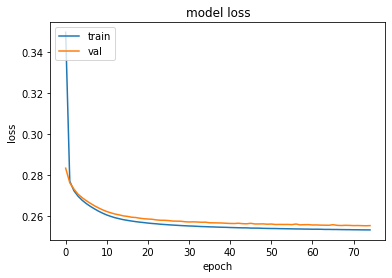

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

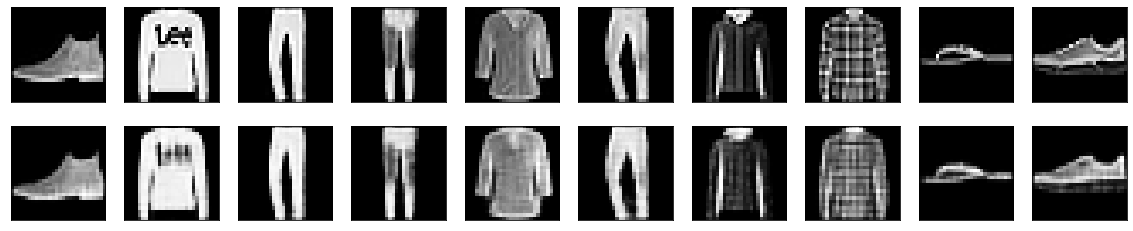

In [ ]:
decoded_imgs_3 = autoencoder3.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
 plt.gray()
 ax = plt.subplot(2, n, i+1)
 plt.imshow(x_test[i].reshape(28, 28))
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 
 ax = plt.subplot(2, n, i +1+n)
 plt.imshow(decoded_imgs_3[i].reshape(28, 28))
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# 4th Autoencoder model

def Encoder_ConvTranspose_3(input_img):
    x = Conv2D(32, (3, 3), activation='leaky_relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='leaky_relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)
    return encoded

def Decoder_ConvTranspose_3(encoded):
    x = Conv2DTranspose(16, (3, 3), strides = 2, activation='leaky_relu', padding='same')(encoded)
    x = Conv2DTranspose(32, (3, 3), strides = 2, activation='leaky_relu', padding='same')(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return decoded


input = Input(shape=(28, 28, 1))
encoder4 = Encoder_ConvTranspose_3(input)
decoder4 = Decoder_ConvTranspose_3(encoder4)
autoencoder4 = Model(input, decoder4)
autoencoder4.compile(optimizer = "adam", loss = "binary_crossentropy")
autoencoder4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 16)       2320  

In [ ]:
history = autoencoder4.fit(x_train, x_train, epochs = 75, batch_size = 256, validation_data = (x_test, x_test)) 

Epoch 1/75
235/235 [==============================] - 18s 28ms/step - loss: 0.3466 - val_loss: 0.2843
Epoch 2/75
235/235 [==============================] - 6s 26ms/step - loss: 0.2768 - val_loss: 0.2753
Epoch 3/75
235/235 [==============================] - 6s 26ms/step - loss: 0.2705 - val_loss: 0.2704
Epoch 4/75
235/235 [==============================] - 6s 27ms/step - loss: 0.2665 - val_loss: 0.2671
Epoch 5/75
235/235 [==============================] - 7s 28ms/step - loss: 0.2637 - val_loss: 0.2646
Epoch 6/75
235/235 [==============================] - 6s 26ms/step - loss: 0.2616 - val_loss: 0.2629
Epoch 7/75
235/235 [==============================] - 6s 27ms/step - loss: 0.2601 - val_loss: 0.2616
Epoch 8/75
235/235 [==============================] - 6s 27ms/step - loss: 0.2590 - val_loss: 0.2607
Epoch 9/75
235/235 [==============================] - 6s 27ms/step - loss: 0.2581 - val_loss: 0.2598
Epoch 10/75
235/235 [==============================] - 6s 26ms/step - loss: 0.2574 - val_l

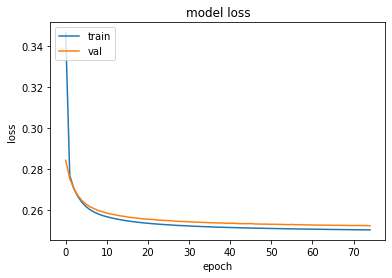

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

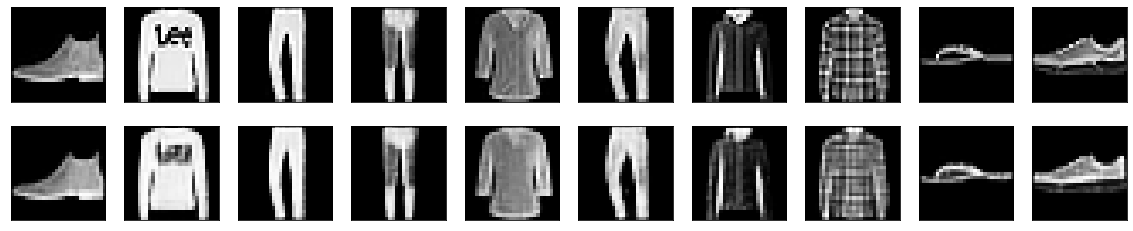

In [ ]:
decoded_imgs_4 = autoencoder4.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
 plt.gray()
 ax = plt.subplot(2, n, i+1)
 plt.imshow(x_test[i].reshape(28, 28))
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 
 ax = plt.subplot(2, n, i +1+n)
 plt.imshow(decoded_imgs_4[i].reshape(28, 28))
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# 5th Autoencoder model

def Encoder_ConvTranspose_4(input_img):
    x = Conv2D(32, (3, 3), activation='leaky_relu', padding='same', strides=2)(input_img)
    x = Conv2D(16, (3, 3), activation='leaky_relu', padding='same', strides=2)(x)
    encoded = Conv2D(16, (3, 3), activation='leaky_relu', padding='same')(x)
    return encoded

def Decoder_ConvTranspose_4(encoded):
    x = Conv2DTranspose(16, (3, 3), strides = 2, activation='leaky_relu', padding='same')(encoded)
    x = Conv2DTranspose(32, (3, 3), strides = 2, activation='leaky_relu', padding='same')(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return decoded


input = Input(shape=(28, 28, 1))
encoder5 = Encoder_ConvTranspose_4(input)
decoder5 = Decoder_ConvTranspose_4(encoder5)
autoencoder5 = Model(input, decoder5)
autoencoder5.compile(optimizer = "adam", loss = "binary_crossentropy")
autoencoder5.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 16)          2320      
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 14, 14, 16)       2320      
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 28, 28, 32)       4640      
 ranspose)                                                 

In [ ]:
history = autoencoder5.fit(x_train, x_train, epochs = 75, batch_size = 256, validation_data = (x_test, x_test)) 

Epoch 1/75
235/235 [==============================] - 7s 23ms/step - loss: 0.3495 - val_loss: 0.2889
Epoch 2/75
235/235 [==============================] - 5s 23ms/step - loss: 0.2811 - val_loss: 0.2826
Epoch 3/75
235/235 [==============================] - 5s 22ms/step - loss: 0.2733 - val_loss: 0.2726
Epoch 4/75
235/235 [==============================] - 5s 23ms/step - loss: 0.2688 - val_loss: 0.2699
Epoch 5/75
235/235 [==============================] - 5s 22ms/step - loss: 0.2663 - val_loss: 0.2675
Epoch 6/75
235/235 [==============================] - 5s 23ms/step - loss: 0.2645 - val_loss: 0.2658
Epoch 7/75
235/235 [==============================] - 5s 22ms/step - loss: 0.2627 - val_loss: 0.2639
Epoch 8/75
235/235 [==============================] - 5s 22ms/step - loss: 0.2611 - val_loss: 0.2624
Epoch 9/75
235/235 [==============================] - 5s 22ms/step - loss: 0.2598 - val_loss: 0.2613
Epoch 10/75
235/235 [==============================] - 5s 22ms/step - loss: 0.2585 - val_lo

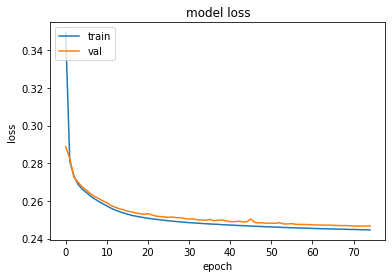

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

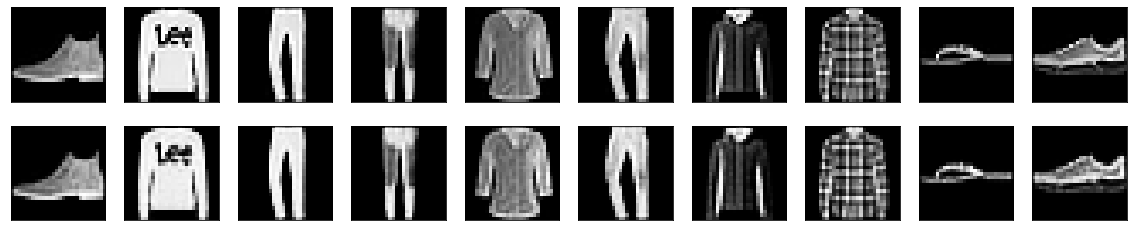

In [ ]:
decoded_imgs_5 = autoencoder5.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
 plt.gray()
 ax = plt.subplot(2, n, i+1)
 plt.imshow(x_test[i].reshape(28, 28))
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 
 ax = plt.subplot(2, n, i +1+n)
 plt.imshow(decoded_imgs_5[i].reshape(28, 28))
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()